## 15.1 友元

类并非只能拥有友元函数，也可以将类作为友元。在这种情况下，友元类的所有方法都可以访问原始类的私有成员和保护成员

In [1]:
#include <iostream>
using namespace std;

In [14]:
// 我们先定义一个类，这个类有一个私有属性age
class Info{
    friend class Person;
    public:
        Info(){age=4;price=5;};
    private:
        int age;
        float price;
}   

In [15]:
// 然后我们再定义一个类，因为前面声明过了Person是友元类，所以这个类可以访问Info的私有方法
class Person{
    public:
    void show(Info &info){cout<<info.age<<"-"<<info.price;};
}

In [17]:
Info i;
Person p;
// 调用的时候直接把i给传进去就可以了
p.show(i);

4-5

In [2]:
// 我们也可以只限定某个函数为友元
class Info1; // forward declaration
// 然后再定义Person1方法
class Person1{
    public:
    void show(Info1 & info);
};
// 再定义Info1
class Info1{
    // 只让show函数才可以访问info的私有变量
    friend void Person1::show(Info1 & info);
    public:
        Info1(){age=9;price=10.1;};
    private:
        int age;
        float price;
};

In [3]:
// 最后实现Person1的方法
inline void Person1::show(Info1 &info){cout<<info.age<<"-"<<info.price;}

In [4]:
// 然后用法就和之前一样了
Info1 i;
Person1 p;
// 这个时候只能show方法去获取私有变量，其他方法调用会出现问题
p.show(i);

9-10.1

In [ ]:
// 友元是可以双向交互的，这里就不演示了
class Tv{
friend class Remote;
};
class Remote{
friend class Tv;
};

需要使用友元的另一种情况是，函数需要访问两个类的私有数据。

从逻辑上看，这样的函数应是每个类的成员函数，但这是不可能的。它可以是一个类的成员，同时是另一个类的友元，但有时将函数作为两个类的友元更合理。

例如，假定有一个Probe类和一个Analyzer类，前者表示某种可编程的测量设备，后者表示某种可编程的分析设备。这两个类都有内部时钟，且希望它们能够同步，则应该包含下述代码行

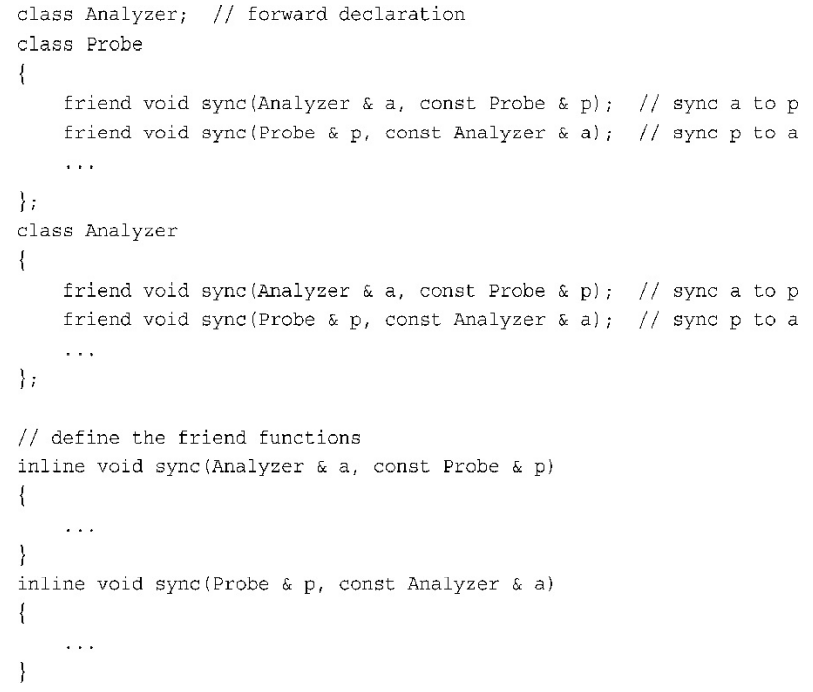

## 15.2 嵌套类

在C++中，可以将类声明放在另一个类中。在另一个类中声明的类
被称为嵌套类（nested class）

In [ ]:
class Queue{
    private:
    // 比如这里我们就定义了一个结构定义，这个就是一种嵌套类
    struct Node{Item item; struct Node * next;};
};
// 用的时候就可以直接用了
bool Queue::enqueue(const Item &item){
    Node * add = new Node(item);
}
// 如果想声明构造函数，可以这样
Queue::Node::Node(const Item &i):item(i),next(0){}

## 15.3 异常

In [7]:
try{
   throw "出现错误";
}catch(const char *s){
    cout<<"错误："<<s<<endl;
}

错误：出现错误


In [8]:
// 还可以返回一个异常对象
class Error{
    public:
        int code;
        Error(int c){code=c;}
}

In [9]:
try{
   throw Error(6);
}catch(const Error e){
    cout<<"错误："<<e.code<<endl;
}

错误：6


In [2]:
// 当然，更推荐的方法就是使用异常类
#include <exception>

In [7]:
class Error1:public std::exception{
    public:
        const char * what(){return "my error";}
};

In [8]:
try{
    throw Error1();
}catch(std::exception & e){
    cout<<"错误:"<<e.what();
}

错误:std::exception

In [9]:
// 如果是内存分配的异常，可以捕获bad_alloc的异常
try{

}catch(bad_alloc & ba){}

In [11]:
// 编译器可能会提供一个标记开关，让我们在失败的时候返回空指针
int * pi = new (std::nothrow) int;
cout<<pi;

0x5653b706f8d0

## 15.4 RTTI

RTTI是运行阶段类型识别（Runtime Type Identification）的简称。
这是新添加到C++中的特性之一，很多老式实现不支持。另一些实现可
能包含开关RTTI的编译器设置。RTTI旨在为程序在运行阶段确定对象
的类型提供一种标准方式。很多类库已经为其类对象提供了实现这种功
能的方式，但由于C++内部并不支持，因此各个厂商的机制通常互不兼
容。创建一种RTTI语言标准将使得未来的库能够彼此兼容。

C++有3个支持RTTI的元素。
- 如果可能的话，dynamic_cast运算符将使用一个指向基类的指针来生成一个指向派生类的指针；否则，该运算符返回0——空指针。
- typeid运算符返回一个指出对象的类型的值。
- type_info结构存储了有关特定类型的信息。


In [2]:
// 架设有下面这种结构
class Grand{};
class Superb:public Grand{};
class Magnificent:public Superb{};
// 然后我们声明三个指针
Grand * pg = new Grand;
Grand * ps = new Superb;
Grand * pm = new Magnificent;

In [5]:
// 这个时候我们就可以这样进行类型转换，如果了可以转换那么就返回对象地址，否则返回空指针
if(ps= dynamic_cast<Superb *>(pg)) cout<<"ok";
// cout<<sb;

input_line_12:3:8: error: '__cling_N52::Grand' is not polymorphic
if(ps= dynamic_cast<Superb *>(pg)) cout<<"ok";
       ^                      ~~


Interpreter Error: 

In [2]:
// typeid可以确保两个对象是否为同种类型
#include <typeinfo>

In [4]:
class Pople{};
Pople * p = new Pople;
if(typeid(Pople) == typeid(*p)) cout<<"是同一个对象";

是同一个对象

## 15.5 类型转换运算符


C语言中的类型转换运算符太过松散，在c++里更严格地限制允许的类型转换，并添加4个类型转换运算符，使转换过程更规范：
- dynamic_cast；
- const_cast；
- static_cast；
- reinterpret_cast。

可以根据目的选择一个适合的运算符，而不是使用通用的类型转换。这指出了进行类型转换的原因，并让编译器能够检查程序的行为是否与设计者想法吻合。

In [5]:
// 比如我们可以这样转换
class Low{};
class High:public Low{};

In [9]:
High * ph = new High;
// 因为low是high的基类，所以这里可以转换动态转换
Low *pl = dynamic_cast<Low *>(ph);

In [10]:
cout<<pl;

0x557f3c380bb0

In [11]:
// const_cast运算符用于执行只有一种用途的类型转换，即改变值为const或volatile，其语法与dynamic_cast运算符相同
High bar;
// 默认情况下，这个pbar是不能修改的
const High * pbar=&bar;
// 但是我们这里可以转换一下
High * pb=const_cast<High *>(pbar);
cout<<pb;

0x7f2353430060

In [12]:
// 我们这里可以修改成另外一个
pb = new High;
cout<<pb;

0x557f3b87dc90